In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from wordcloud import WordCloud, STOPWORDS
import geopandas as gpd
import seaborn as sns

%matplotlib inline

# Cau 1: Numpy Array

In [219]:
def kiem_tra_chu_so(so):
    num_list = np.array([int(i) for i in list(str(so))] )
    if ((num_list%2==0).all()) or ((num_list%2!=0).all()) ==True :
        return True
        
arr = np.random.randint(1,100, size=(4,4))
arr

array([[53, 79, 12, 95],
       [31, 89, 53, 65],
       [98, 92, 50, 14],
       [61, 86, 36, 16]])

In [225]:
arr_true = np.array([])
for i in range(len(arr)):
    for j in range(len(arr[0])):
        if kiem_tra_chu_so(arr[i][j]):
            arr_true = np.append(arr_true, arr[i][j])
arr_true

array([53., 79., 95., 31., 53., 86.])

# Cau 2

In [23]:
udemy = pd.read_csv('udemy_courses.csv')
udemy.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [24]:
udemy.tail()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,2016-06-14T17:36:46Z,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,2017-03-10T22:24:30Z,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30T16:41:42Z,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11T19:06:15Z,Web Development
3677,297602,Using MODX CMS to Build Websites: A Beginner's...,https://www.udemy.com/using-modx-cms-to-build-...,True,45,901,36,20,Beginner Level,2.0,2014-09-28T19:51:11Z,Web Development


In [25]:
udemy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
course_id              3678 non-null int64
course_title           3678 non-null object
url                    3678 non-null object
is_paid                3678 non-null bool
price                  3678 non-null int64
num_subscribers        3678 non-null int64
num_reviews            3678 non-null int64
num_lectures           3678 non-null int64
level                  3678 non-null object
content_duration       3678 non-null float64
published_timestamp    3678 non-null object
subject                3678 non-null object
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.7+ KB


In [26]:
udemy.isna().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

In [27]:
stopwords = set(STOPWORDS)

In [37]:
text = ''
for index, value in udemy.course_title.items():
    text += value

In [39]:
wc = WordCloud(
    stopwords=stopwords
).generate(text)

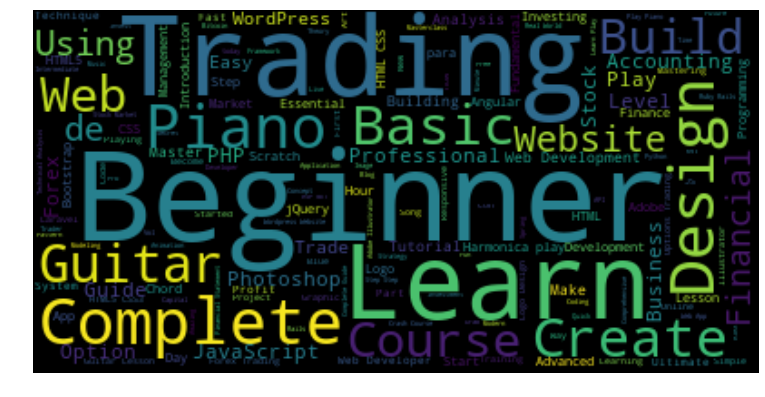

In [45]:
plt.figure(figsize=(13,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [42]:
from PIL import Image

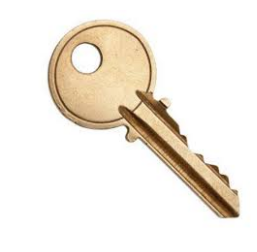

In [44]:
wc_mask = np.array(Image.open('chiakhoa.jpg'))
plt.imshow(wc_mask, interpolation='bilinear')
plt.axis('off')
plt.show()

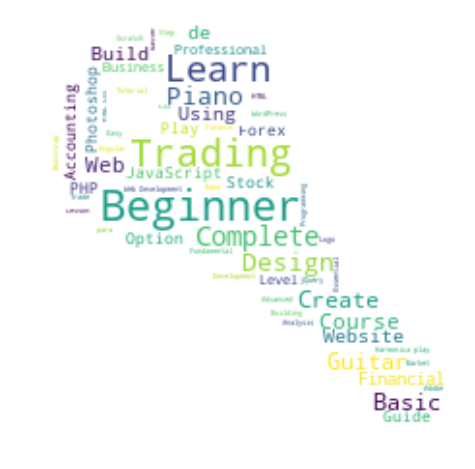

In [49]:
wc1 = WordCloud(
    background_color='white',
    mask = wc_mask,
    stopwords=stopwords
).generate(text)
plt.figure(figsize=(13,8))
plt.imshow(wc1, interpolation='bilinear')
plt.axis('off')
plt.show()

## Supermarket Sales

In [50]:
df_sales = pd.read_csv('supermarket_sales.csv')
df_sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [51]:
df_sales.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


In [52]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
Invoice ID                 1000 non-null object
Branch                     1000 non-null object
City                       1000 non-null object
Customer type              1000 non-null object
Gender                     1000 non-null object
Product line               1000 non-null object
Unit price                 1000 non-null float64
Quantity                   1000 non-null int64
Tax 5%                     1000 non-null float64
Total                      1000 non-null float64
Date                       1000 non-null object
Time                       1000 non-null object
Payment                    1000 non-null object
cogs                       1000 non-null float64
gross margin percentage    1000 non-null float64
gross income               1000 non-null float64
Rating                     1000 non-null float64
dtypes: float64(7), int64(1), object(9)
memory usage: 132.9+ KB


In [54]:
df_sales.describe(include='all')

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
count,1000,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000,1000.00000,1000.000000,1000.000000,1000.00000
unique,1000,3,3,2,2,6,NaN,NaN,NaN,NaN,89,506,3,NaN,NaN,NaN,NaN
top,648-83-1321,A,Yangon,Member,Female,Fashion accessories,NaN,NaN,NaN,NaN,2/7/2019,19:48,Ewallet,NaN,NaN,NaN,NaN
freq,1,340,340,501,501,178,NaN,NaN,NaN,NaN,20,7,345,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,55.672130,5.510000,15.379369,322.966749,NaN,NaN,NaN,307.58738,4.761905,15.379369,6.97270
std,NaN,NaN,NaN,NaN,NaN,NaN,26.494628,2.923431,11.708825,245.885335,NaN,NaN,NaN,234.17651,0.000000,11.708825,1.71858
min,NaN,NaN,NaN,NaN,NaN,NaN,10.080000,1.000000,0.508500,10.678500,NaN,NaN,NaN,10.17000,4.761905,0.508500,4.00000
25%,NaN,NaN,NaN,NaN,NaN,NaN,32.875000,3.000000,5.924875,124.422375,NaN,NaN,NaN,118.49750,4.761905,5.924875,5.50000
50%,NaN,NaN,NaN,NaN,NaN,NaN,55.230000,5.000000,12.088000,253.848000,NaN,NaN,NaN,241.76000,4.761905,12.088000,7.00000
75%,NaN,NaN,NaN,NaN,NaN,NaN,77.935000,8.000000,22.445250,471.350250,NaN,NaN,NaN,448.90500,4.761905,22.445250,8.50000


In [55]:
df_sales.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [57]:
df_sales.Date = pd.to_datetime(df_sales.Date)

In [59]:
df_sales.Date.head()

0   2019-01-05
1   2019-03-08
2   2019-03-03
3   2019-01-27
4   2019-02-08
Name: Date, dtype: datetime64[ns]

In [68]:
df_sales['weekday'] = df_sales.Date.dt.day_name()
df_sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,weekday
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,Saturday
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,Friday
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,Sunday
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,Sunday
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,Friday


In [69]:
df_sales['month_name'] = df_sales.Date.dt.month_name()
df_sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,weekday,month_name
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,January
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,Friday,March
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,Sunday,March
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,Sunday,January
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,Friday,February


In [84]:
value = df_sales['month_name'].value_counts().values
names = df_sales['month_name'].value_counts().index
penct = [i/sum(value) for i in value]
penct

[0.352, 0.345, 0.303]

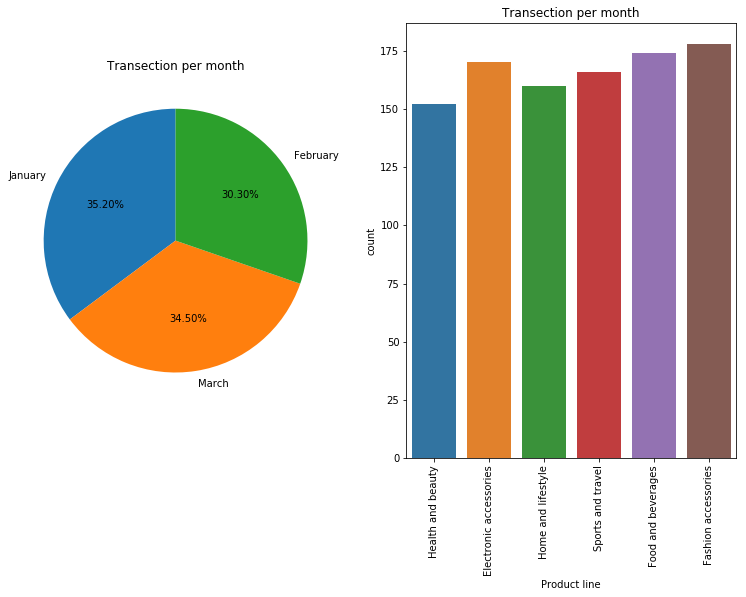

In [202]:
plt.figure(figsize=(13,8))
plt.subplot(122)
sns.countplot(data=df_sales,
              x='Product line',
          )
plt.xticks(rotation=90)
plt.title('Transection per month')
plt.subplot(121)
plt.pie(penct,
        startangle=90, 
        labels=names,
        autopct = '%.2f%%'
       )
plt.title('Transection per month')
plt.show()

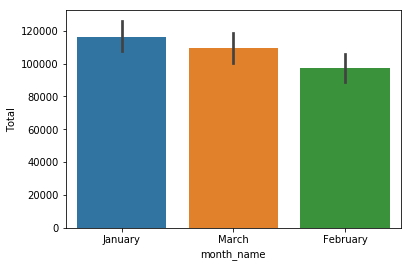

In [108]:
sns.barplot(data=df_sales,
            x='month_name',
            y='Total',
            estimator=sum
           )

In [ ]:
pd.sort_values('weekdaay')

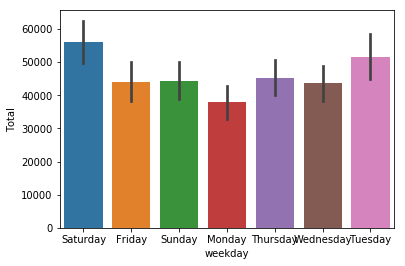

In [111]:
sns.barplot(data=df_sales,
            x='weekday',
            y='Total',
            estimator=sum
           )

In [113]:
df_sales.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'weekday', 'month_name'],
      dtype='object')

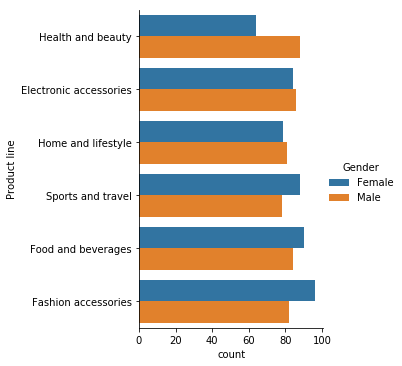

In [114]:
sns.catplot(data=df_sales,
            y='Product line',
            hue='Gender',
            kind='count'
           )

In [115]:
df_sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,weekday,month_name
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,January
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,Friday,March
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,Sunday,March
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,Sunday,January
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,Friday,February


Text(0.5, 1.0, 'Frequency Transection per month')

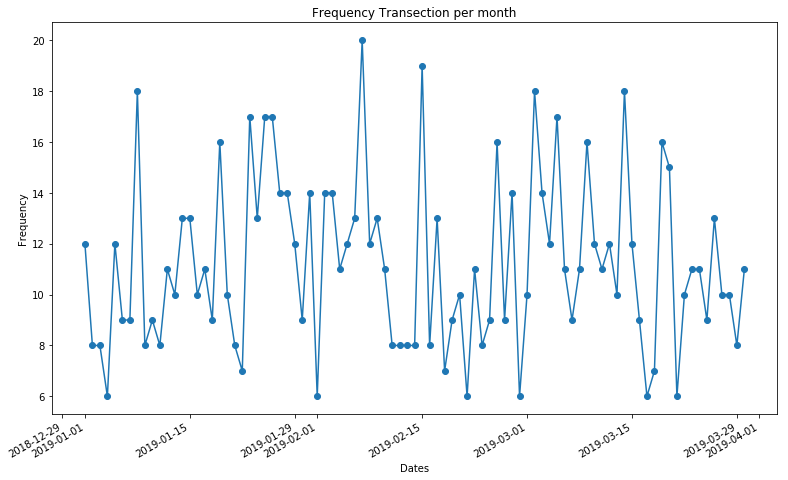

In [135]:
plt.figure(figsize=(13,8))
ax = df_sales['Date'].value_counts().plot(marker='o')
ax.set_ylabel('Frequency')
ax.set_xlabel('Dates')
ax.set_title('Frequency Transection per month')

<Figure size 1152x648 with 0 Axes>

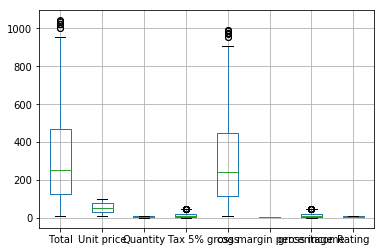

In [168]:
df_new = df_sales[['Total', 'Unit price', 'Quantity', 'Tax 5%', 'cogs', 'gross margin percentage', 'gross income', 'Rating']]
plt.figure(figsize=(16,9))
df_new.plot.box()
plt.grid()
plt.show()

In [169]:
print(df_new.shape)
for name in df_new.columns:
    q25, q75 = np.percentile(df_new[name], 25), np.percentile(df_new[name], 75)
    iqr = q75-q25
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    ind = df_new[(df_new[name] < lower)| (df_new[name] > upper)].index.copy()
    df_new.drop(ind, inplace=True)
df_new.shape

(1000, 8)


(991, 8)

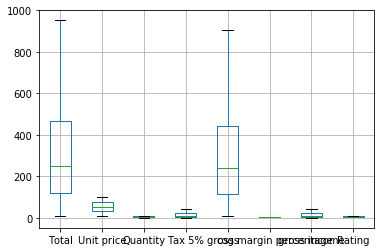

In [170]:
df_new.plot.box()
plt.grid()

## Cau 3 Truc quan hoa ban do

In [171]:
world_gdp_2014 =pd.read_csv(r'2014_world_gdp.csv')
world_gdp_2014.head()

,Unnamed: 0,COUNTRY,GDP_CODE
0,0,Afghanistan,21.71 AFG
1,1,Albania,13.4 ALB
2,2,Algeria,227.8 DZA
3,3,American Samoa,0.75 ASM
4,4,Andorra,4.8 AND


In [172]:
world_gdp_2014.tail()

,Unnamed: 0,COUNTRY,GDP_CODE
217,217,Virgin Islands,5.08 VGB
218,218,West Bank,6.64 WBG
219,219,Yemen,45.45 YEM
220,220,Zambia,25.61 ZMB
221,221,Zimbabwe,13.74 ZWE


In [173]:
world_gdp_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 3 columns):
Unnamed: 0    222 non-null int64
COUNTRY       222 non-null object
GDP_CODE      222 non-null object
dtypes: int64(1), object(2)
memory usage: 5.3+ KB


In [175]:
world_gdp_2014.describe(include='all')

,Unnamed: 0,COUNTRY,GDP_CODE
count,222.000000,222,222
unique,NaN,222,222
top,NaN,Tunisia,62.72 KEN
freq,NaN,1,1
mean,110.500000,NaN,NaN
std,64.230055,NaN,NaN
min,0.000000,NaN,NaN
25%,55.250000,NaN,NaN
50%,110.500000,NaN,NaN
75%,165.750000,NaN,NaN


In [180]:
world_gdp_2014['GDP'] = world_gdp_2014['GDP_CODE'].str.extract(r'(\d+\.\d+)')
world_gdp_2014.head()

,Unnamed: 0,COUNTRY,GDP_CODE,GDP
0,0,Afghanistan,21.71 AFG,21.71
1,1,Albania,13.4 ALB,13.4
2,2,Algeria,227.8 DZA,227.8
3,3,American Samoa,0.75 ASM,0.75
4,4,Andorra,4.8 AND,4.8


In [181]:
world_gdp_2014['GDP'] = pd.to_numeric(world_gdp_2014['GDP'])
world_gdp_2014['GDP'].dtype

dtype('float64')

In [197]:
world_gdp_2014.groupby('COUNTRY')['GDP'].max()

COUNTRY
Afghanistan                  21.71
Albania                      13.40
Algeria                     227.80
American Samoa                0.75
Andorra                       4.80
Angola                      131.40
Anguilla                      0.18
Antigua and Barbuda           1.24
Argentina                   536.20
Armenia                      10.88
Aruba                         2.52
Australia                  1483.00
Austria                     436.10
Azerbaijan                   77.91
Bahamas, The                  8.65
Bahrain                      34.05
Bangladesh                  186.60
Barbados                      4.28
Belarus                      75.25
Belgium                     527.80
Belize                        1.67
Benin                         9.24
Bermuda                       5.20
Bhutan                        2.09
Bolivia                      34.08
Bosnia and Herzegovina       19.55
Botswana                     16.30
Brazil                     2244.00
British Virg

In [182]:
world_gdp_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 4 columns):
Unnamed: 0    222 non-null int64
COUNTRY       222 non-null object
GDP_CODE      222 non-null object
GDP           222 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 7.0+ KB


In [183]:
import folium

In [199]:
world_map =  folium.Map(location=[0,0], zoom_start=3, tiles='cartodbpositron')
world_map

In [200]:
folium.Choropleth(
    geo_data=r'world-countries.json',
    data=world_gdp_2014,
    columns=['COUNTRY', 'GDP'],
    key_on = 'feature.properties.name',
    fill_color = 'Reds',
    fill_opacity=0.5,
    line_opacity=0.7,
    legend_name='GDP of the country'
).add_to(world_map)
world_map